In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data

city_df = pd.read_csv(city_data)

ride_df = pd.read_csv(ride_data)

In [3]:
# Combine the data into a single dataset

merged_df = pd.merge(ride_df, city_df, on='city', how='inner')

In [4]:
# Display the data table for preview

merged_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

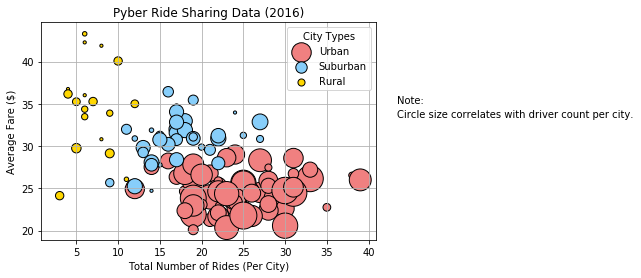

In [5]:
# Obtain the x and y coordinates for each of the three city types

city_types = ['Urban', 'Suburban', 'Rural']

city_type_loc = [(merged_df.loc[merged_df['type'] == x]) for x in city_types]

list_index = [0, 1, 2]

rides_per_city_type =[(city_type_loc[y].groupby("city")['date'].count()) for y in list_index]

avg_fare_by_city_type =[(city_type_loc[y].groupby('city')["fare"].mean()) for y in list_index]

avg_fare_by_city_type

# Build the scatter plots for each city types

driver_count= [(city_type_loc[y].groupby('city')['driver_count'].min()) for y in list_index]

urban = plt.scatter(rides_per_city_type[0], avg_fare_by_city_type[0], label="Urban", color="lightcoral", edgecolors='black', s=driver_count[0]*10)
suburban = plt.scatter(rides_per_city_type[1], avg_fare_by_city_type[1], label="Suburban", color='lightskyblue', edgecolors='black', s=driver_count[1]*10)
rural = plt.scatter(rides_per_city_type[2], avg_fare_by_city_type[2], label='Rural', color='gold', edgecolors='black', s=driver_count[2]*10)

# Incorporate the other graph properties

plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride Sharing Data (2016)')
plt.grid()

# Create a legend

plt.legend(handles=[urban, suburban,rural], title="City Types")

# Incorporate a text label regarding circle size

plt.figtext(.95,.6,"Note:")
plt.figtext(.95,.55,"Circle size correlates with driver count per city.")

# Save Figure
plt.savefig("pyber_ride_sharing_data.png")

In [6]:
# Show plot
plt.show()

## Total Fares by City Type

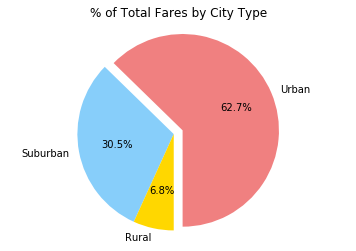

In [13]:
# Calculate Type Percents

total_fares_by_city = [(round(city_type_loc[y]["fare"].sum(),2)) for y in list_index]

total_fares = sum(total_fares_by_city)

total_fares_percents = [round((total_fares_by_city[y]/total_fares*100),1) for y in list_index]

# Build Pie Chart

colors = ["lightcoral", "lightskyblue", "gold"]

labels = ["Urban", "Suburban", "Rural"]

explode = (0.1, 0, 0)

plt.pie(total_fares_percents, colors=colors, autopct="%1.1f%%", explode=explode, startangle = 270, labels=labels)

plt.axis('equal')
plt.title('% of Total Fares by City Type')

# Save Figure
plt.savefig("%_total_fares_city_type.png")


In [8]:
# Show Figure
plt.show()

## Total Rides by City Type

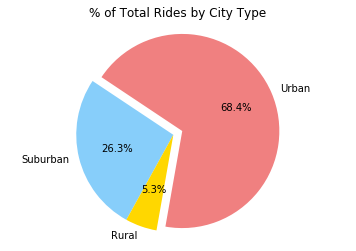

In [9]:
# Calculate Ride Percents

total_rides_city_type = [(len(city_type_loc[y])) for y in list_index]

total_rides = len(merged_df['date'])

city_type_percents = [round((total_rides_city_type[y]/total_rides*100),2) for y in list_index]

# Build Pie Chart

colors = ["lightcoral", "lightskyblue", "gold"]

labels = ["Urban", "Suburban", "Rural"]

explode = (0.1, 0, 0)

plt.pie(city_type_percents, colors=colors, autopct="%1.1f%%", explode=explode, startangle = 260, labels=labels)

plt.axis('equal')
plt.title('% of Total Rides by City Type')

# Save Figure
plt.savefig("%_total_rides_city_type.png")

In [10]:
# Show Figure
plt.show()

## Total Drivers by City Type

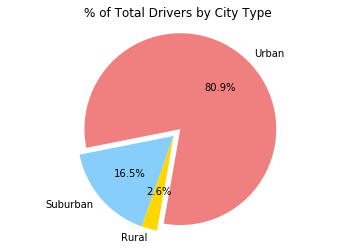

In [11]:
# Calculate Driver Percents

total_drivers_city_type = [(sum(city_type_loc[y].groupby('city')['driver_count'].min())) for y in list_index]

total_drivers = sum(total_drivers_city_type)

drivers_percents = [round((total_drivers_city_type[y]/total_drivers*100),1) for y in list_index]


# Build Pie Charts

colors = ["lightcoral", "lightskyblue", "gold"]

labels = ["Urban", "Suburban", "Rural"]

explode = (0.1, 0, 0)

plt.pie(drivers_percents, colors=colors, autopct="%1.1f%%", explode=explode, startangle = 260, labels=labels)

plt.axis('equal')
plt.title('% of Total Drivers by City Type')

# Save Figure
plt.savefig("%_total_drivers_city_type.png")

In [12]:
# Show Figure
plt.show()